In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('pima-indians-diabetes-database/diabetes.csv') #read the data
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [10]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

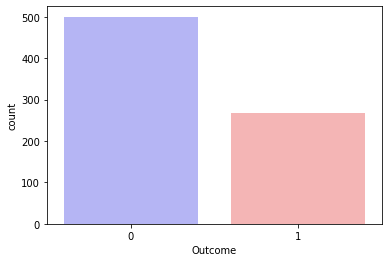

In [12]:
sns.countplot(x="Outcome", data=df, palette="bwr")
plt.show()

In [15]:
countNoDisease = len(df[df.Outcome == 0])
countHaveDisease = len(df[df.Outcome == 1])
print("No Disease: {:.2f}%".format((countNoDisease / (len(df.Outcome))*100)))
print("Disease: {:.2f}%".format((countHaveDisease / (len(df.Outcome))*100)))

No Disease: 65.10%
Disease: 34.90%


In [16]:
y = df.Outcome.values
X = df.drop(['Outcome'],axis = 1)

In [17]:
X = (X - np.min(X))/(np.max(X) - np.min(X)).values

In [18]:
msk = np.random.rand(len(df))<0.8
X_train = X[msk]
y_train = y[msk]
X_test = X[~msk]
y_test = y[~msk]

In [19]:
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [20]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1)) #w corresponds to the weights
    b = 0 #b correspsonds to the bias
    
    return w,b

In [21]:
def sigmoid(z):
    
    f = 1/(1+np.exp(-z))
    return f

In [22]:
def propagate(w,b,X,y):
    
    m = X.shape[1]
    
    #Forward Pass
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*(np.sum(y*np.log(A)+(1-y)*np.log(1-A)))
    
    #Backward Pass
    dw = (1/m)*(np.dot(X,(A-y).T))
    db = (1/m)*np.sum(A-y)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads,cost
    

In [23]:
def optimize(w, b, X, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    index = []
    
    for i in range(num_iterations):
        
        grads,cost = propagate(w,b,X,y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        costs.append(cost)
        index.append(i)
    
    params = {"w":w,"b":b}
    
    plt.plot(index,costs)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return params, grads, cost

In [24]:
def predict(w,b,X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))

    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        if A[0,i]>0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

In [25]:
def model(X_train,y_train,X_test,y_test,num_iterations,learning_rate,print_cost = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

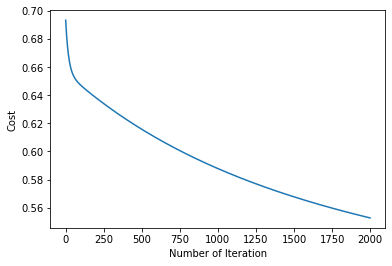

train accuracy: 71.49837133550488 %
test accuracy: 69.48051948051949 %


In [26]:
model(X_train,y_train,X_test,y_test,2000,0.05,print_cost = True)